# Plot Results of Comparison
The purpose of the plot is to compare the performance of different methods, and show how their accuracy changes as a function of training set size.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import sem
import pandas as pd
import numpy as np
import json

In [2]:
plot_width = 89 / 25.4
plot_height = plot_width * 3 / 4
font_size = 12

## Load in the Results
This JSON file contains the number of QH that were found to be stable for many different methods as a function of training set size.

In [3]:
raw_data = json.load(open('test-results.json'))

## Compute Averages
Get the average performance over all of the tests

In [4]:
results = []
for method, tests in raw_data.items():
    for size, scores in tests.items():
        results.append({
            'method': method,
            'size': int(size),
            'mean': np.mean(scores),
            'sem': sem(scores) 
        })
results = pd.DataFrame(results)

Print out performance at 1 QH and 1000 QHs (used in discussion in text)

In [5]:
results.query('size == 1').sort_values('mean')

,mean,method,sem,size
20,0.00,Faber\nMethod,0.000000,1
24,0.00,DMSP,0.000000,1
10,0.12,"Ward,\nonly QH",0.066332,1
0,0.24,Random\nSearch,0.087178,1
5,0.80,Electron\nCounting,0.200000,1
15,8.16,"Ward,\nall OQMD",0.438482,1


In [6]:
results.query('size == 1000').sort_values('mean')

,mean,method,sem,size
3,0.20,Random\nSearch,0.081650,1000
8,0.60,Electron\nCounting,0.182574,1000
13,3.72,"Ward,\nonly QH",0.348903,1000
27,3.88,DMSP,0.466619,1000
18,8.00,"Ward,\nall OQMD",0.326599,1000
23,11.16,Faber\nMethod,0.857671,1000


In [7]:
results.query('size == 10000').sort_values('mean')

,mean,method,sem,size
4,0.28,Random\nSearch,0.108321,10000
9,0.76,Electron\nCounting,0.166132,10000
14,11.00,"Ward,\nonly QH",0.642910,10000
19,12.12,"Ward,\nall OQMD",0.641145,10000
28,12.72,DMSP,0.649410,10000


## Plot the Results
Make a plot with error bars

Define the plot styles

In [7]:
plot_style = dict([(method, {'linestyle': '--', 'marker': 'o', 'color': 'b',}) for method in raw_data.keys()])

In [8]:
plot_style['Random\nSearch']['color'] = 'k'
plot_style['Electron\nCounting']['color'] = 'grey'

plot_style['Ward,\nonly QH']['marker'] = 's'
plot_style['Ward,\nall OQMD']['marker'] = 's'
plot_style['Ward,\nall OQMD']['linestyle'] = '-'

plot_style['Faber\nMethod']['color'] = 'r'
plot_style['Faber\nMethod']['marker'] = 'v'
plot_style['Faber\nMethod']['linestyle'] = '-'

plot_style['DMSP']['linestyle'] = ':'
plot_style['DMSP']['marker'] = '^'
plot_style['DMSP']['color'] = 'green'

Make a lookup table for shorter names

In [9]:
method_name = dict([(m,m.replace('\n', ' ')) for m in raw_data.keys()])

In [10]:
method_name['Random\nSearch'] = 'Random'
method_name['Electron\nCounting'] = 'Heuristic'
method_name['Ward,\nonly QH'] = 'Ward, QH'
method_name['Ward,\nall OQMD'] = 'Ward'
method_name['Faber\nMethod'] = 'Faber'

Make the plot

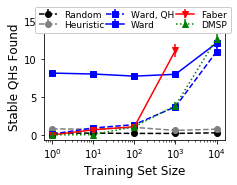

In [11]:
fig, ax = plt.subplots()

for method in raw_data.keys():
    my_results = results[results['method'] == method]
    ax.errorbar(my_results['size'], my_results['mean'], yerr=my_results['sem'],
                label=method_name[method], **plot_style[method])

ax.set_xscale('log')
ax.set_ylim(min(ax.get_ylim()), 16)

ax.legend(ncol=3, fontsize=font_size*0.75, loc=(-0.05, 0.85),
          labelspacing=0.1, columnspacing=0.2,
          facecolor='w', framealpha=1)

ax.set_ylabel('Stable QHs Found', fontsize=font_size)
ax.set_xlabel('Training Set Size', fontsize=font_size)

fig.set_size_inches(plot_width, plot_height)
fig.tight_layout()
fig.savefig('search-method-comparison.png', dpi=320)
fig.savefig('search-method-comparison.pdf')